In [20]:
# useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# load dataset
rideshare = pd.read_csv("data/rideshare_kaggle.csv")
rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [22]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [23]:
# Nulvalues or duplicated rows ?
rideshare.duplicated().sum()

print('{} of data is NuLL'.format(
    str(round(rideshare.isna().sum().sum() / rideshare.size * 100,3))+'%'))

0.139% of data is NuLL


In [24]:
rideshare.dropna(axis=0,inplace=True)

In [25]:
# We want to prodict the (price) so we Remove the following features Because it has no effect on the price of the trip

rideshare = rideshare.drop(['id','timestamp','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'product_id'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 42)


,hour,day,month,datetime,timezone,source,destination,cab_type,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [26]:
## check for year in datetime
rideshare['year'] = rideshare['datetime'].apply(lambda x: x.split('-')[0])
rideshare["year"].unique()

array(['2018'], dtype=object)

In [27]:
# Delete data time and Year because all data in the same year

rideshare = rideshare.drop(['datetime','year'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 41)


,hour,day,month,timezone,source,destination,cab_type,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


<AxesSubplot:>

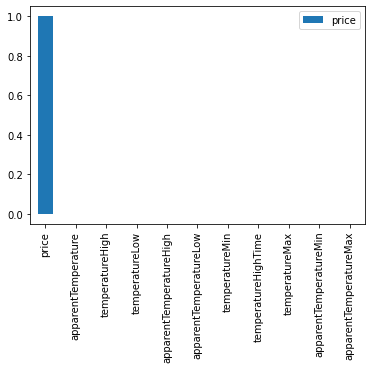

In [28]:
# Checking the correlation between Price and Temperature related features

rideshare_new = rideshare[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [29]:
# Removing all the temperature related features from the dataframe as they have very weak correlation with the predictand (price)
rideshare = rideshare.drop(rideshare_new.columns[1:],axis=1)

In [30]:
# Analyzing features with numeric data types

num_col = rideshare.select_dtypes(include=['int64','float64']).columns.tolist()
rideshare_new = rideshare[num_col]
rideshare_new.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax'],
      dtype='object')

<AxesSubplot:>

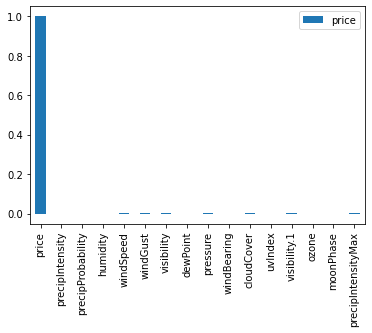

In [31]:
# Analyzing climate related features with price column

cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
rideshare_new = rideshare[cli_col]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [32]:
# Removing all the climate related features from the dataframe as they have very weak correlation with the predictand (price)

rideshare = rideshare.drop(cli_col[1:],axis=1)

In [33]:
rideshare.shape

(637976, 15)

In [34]:
# Analyzing data in the categorical features

cat_col = rideshare.select_dtypes(include=['object','category']).columns.tolist()
rideshare_new = rideshare[cat_col]
rideshare_new.head()

,timezone,source,destination,cab_type,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night


In [35]:
#Checking for unique values in all categorical columns
for col in rideshare_new:
    print(f'{col} : {rideshare_new[col].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

icon : [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']



In [36]:
# Removing timezone column as it has only value across all data
rideshare = rideshare.drop(['timezone'],axis=1)

In [37]:
# Encoding all the category columns with the Onehot Encoder

# Reset index before using Onehot Encoder
rideshare = rideshare.reset_index(drop=True)

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_col = rideshare.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original rideshare with encoded column rideshare's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_rideshare = pd.DataFrame(encoder.fit_transform(rideshare[[col]]).toarray())
    enc_rideshare.columns = encoder.get_feature_names([col])
    rideshare = rideshare.drop(col, axis=1)
    rideshare = pd.concat([rideshare, enc_rideshare], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [40]:
rideshare.isna().sum().sum()

0

In [41]:
rideshare.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'nam

<AxesSubplot:>

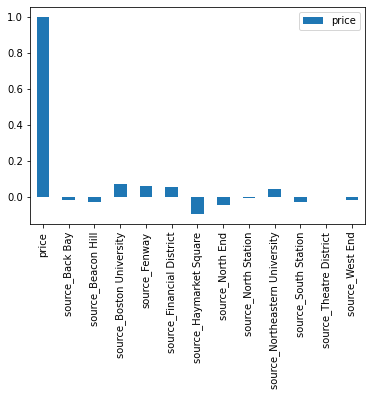

In [42]:
# Analyzing source column values with price

src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']
rideshare_new = rideshare[src_col]


#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [43]:
# Source have small impact on the price, so we will drop it
rideshare = rideshare.drop(src_col[1:],axis=1)
print(rideshare.shape)


(637976, 50)


<AxesSubplot:>

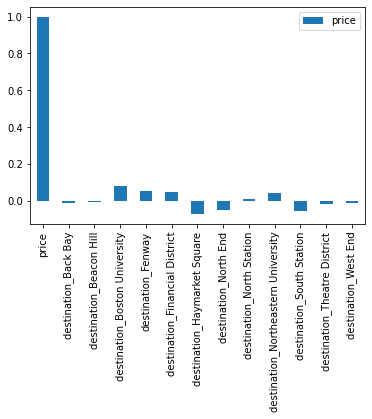

In [44]:
# Analyzing destination column values with price
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
rideshare_new = rideshare[dst_col]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [45]:
# Correlation values of Destination are very low(almost 0), So removing them.
rideshare = rideshare.drop(dst_col[1:],axis=1)
print(rideshare.shape)

(637976, 38)


<AxesSubplot:>

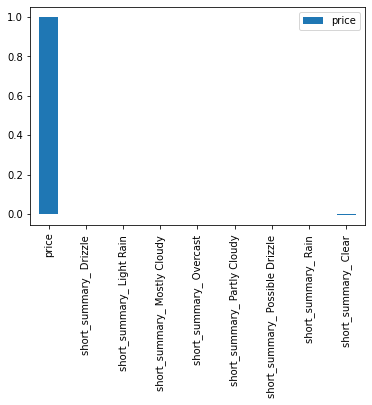

In [46]:
# Checking correlation of summary column with price

summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
rideshare_new = rideshare[summ_cols]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [47]:
# Summary has no impact on Price, so removing them from data frame
rideshare = rideshare.drop(summ_cols[1:],axis=1)
print(rideshare.shape)

(637976, 29)


<AxesSubplot:>

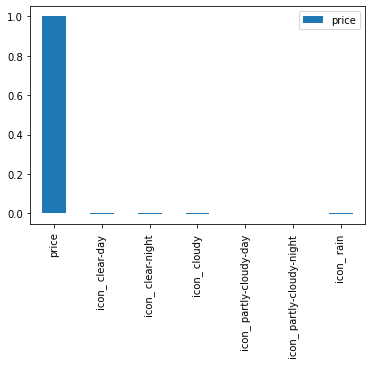

In [48]:
# Analyzing ICON Columns

ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
rideshare_new = rideshare[ico_cols]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar()

In [49]:
# Deleting all ICON related cols as it does not have any effect with Price
rideshare = rideshare.drop(ico_cols[1:],axis=1)
print(rideshare.shape)

(637976, 22)


<AxesSubplot:>

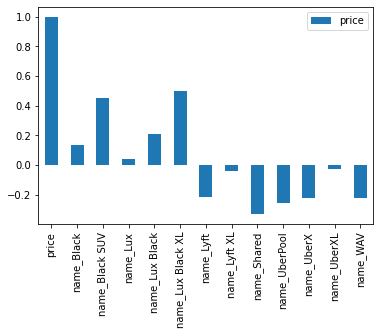

In [50]:
# Analyzing name cols with price
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
rideshare_new = rideshare[nme_cols]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 


###### Some values of names do have effect on Price value.

In [51]:
rideshare.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

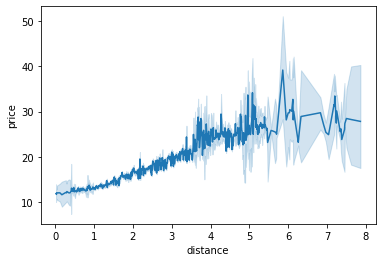

In [52]:
#plotting relartion between price and distance 
sns.lineplot( x=rideshare['distance'] , y=rideshare['price'])
plt.show()

<AxesSubplot:>

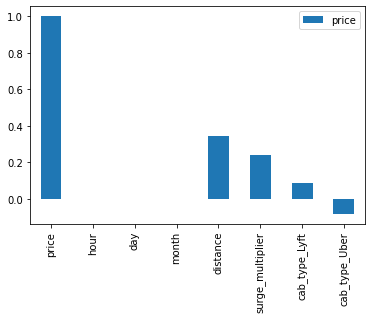

In [53]:
# relation with other columns
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
rideshare_new = rideshare[rem_cols]

#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare_new.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [54]:
# From above figure, month day, hour, but distance and surge_multiplier has good correlation with Price, So we will drop weakly correlated columns

rideshare = rideshare.drop(['month','day','hour'],axis=1)
print(rideshare.shape)
rideshare.head()

(637976, 19)


,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Checking for outliers. Checking Min and Max threshold values and Plotting box plot on Price column

max_threshold = rideshare['price'].quantile(0.99)

min_threshold = rideshare['price'].quantile(0.01)

print(f"Max Price range : {max_threshold}")
print(f"Min Price range : {min_threshold}")

Max Price range : 42.5
Min Price range : 3.5


<AxesSubplot:xlabel='price'>

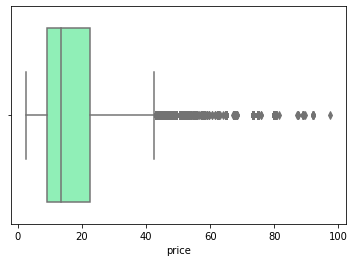

In [56]:
 # check outliers of cost
sns.boxplot(data=rideshare,x='price',palette='rainbow',orient='h')

In [57]:
# Values above 43 are the outliers of our dataset. Checking the indexes and count of those observtions:

out = np.where(rideshare['price'] > 43)

print(np.count_nonzero(np.where(rideshare['price'] > 43)))

print("Precentage of rides that above 43$ is {}%".format(
    round(np.count_nonzero(np.where(rideshare['price'] > 43))/rideshare.size, 6)))

5357
Precentage of rides that above 43$ is 0.000442%


In [58]:
# Removing all the 5357 rows in that array, as if these outliers are included, error value will increase

rideshare.drop(out[0], inplace = True)
rideshare.shape

(632619, 19)

<AxesSubplot:>

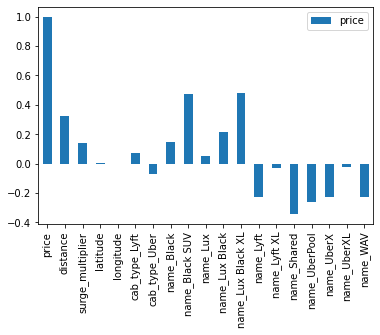

In [59]:
#plotting relation between correlation and rideshare_new dataframe
correlation=rideshare.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar() 

In [60]:
rideshare.head()

,price,distance,surge_multiplier,latitude,longitude,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,42.2148,-71.033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
## final data for model training
rideshare.to_csv("data/clean_rideshare_data.csv")



Model Building for price prediction

In [62]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [63]:
# separate input and target feature

X=rideshare.drop(['price'],axis=1)
y=rideshare['price']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506095, 18)
(126524, 18)
(506095,)
(126524,)


In [65]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [66]:
## applying model and evalution

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 2.2575400017344136
MAE: 1.6780207953507784
R2 score 93.40534038553264


Lasso
Model Training Performance
RMSE: 7.792353719324903
MAE: 6.581128192659173
R2 score 21.429631135529124


Ridge
Model Training Performance
RMSE: 2.257542133084959
MAE: 1.677954035152261
R2 score 93.4053279334494


Elasticnet
Model Training Performance
RMSE: 8.001267561885127
MAE: 6.723560720714911
R2 score 17.16019607366658


RandomForestRegressor
Model Training Performance
RMSE: 1.7035429628871095
MAE: 1.143140297853419
R2 score 96.24484682287834


